# Linear Regression

Let $\Phi: X \mapsto \mathbb{R}^N$ be a feature mapping from the input space $\mathcal{X}$ to $\mathbb{R}^N$ and consider the family of linear hypotheses 
$H=\{x\rightarrow  {\bf w.\Phi}(x)+ b:  {\bf w} \in \mathbb{R}^N,b\in \mathbb{R}\}$

* Linear regression consists of seeking  hypothesis in $H$ with the smallest empirical mean square error.

* For a sample $S=\left((x_1,y_1),\dots,(x_m,y_m)\right) \in (\mathcal{X}\times \mathcal{Y})^m$,

* The following is the corresponding **_Optimizaion Problem:_**

$\min_{{\bf w},b} \frac{1}{m}\left({\bf w.\Phi}(x_i)+b-y_i\right)^2$

* The optimization problem admits the simpler formulation:

$\min_{w,b}F({\bf W}) = \frac{1}{m} \Vert {\bf X^TW-Y}\Vert^2$

using the notation ${\bf X} = \begin{bmatrix} \Phi(x_1) &\dots &\Phi(x_m)\\1 &\dots &1 \end{bmatrix}$,

${\bf W} = \begin{bmatrix}w_1\\ \vdots \\w_n \end{bmatrix}$ and

${\bf Y}= \begin{bmatrix}y_1\\ \vdots \\y_m \end{bmatrix}$

* The object function $F$ is convex, by composition of the convex function $\bf u\mapsto \Vert u \Vert^2$ with the affine function $\bf W\mapsto X^TW -Y$ and itis deferentiable. 

* $F$ admits a goal minimum at $\bf W$ if and only if $\nabla F({\bf W}) = 0$, that is if and only if $\frac{2}{m}{\bf X(X^TW - Y) = 0 \iff  XX^TW=XY}$

when $\bf XX^T$ is invertible, then the equation admits a unique solution. 

# Another way to define linear regression

**Formulation**

Given a data set $\{y_i,\, x_{i1}, \ldots, x_{ip}\}_{i=1}^n$  of $n$ statistical units, a linear regression model assumes that the relationship between the dependent variable $y$ and $p-vector$ of regressors $\bf x$ is linear. This relationship is modeled through a *disturbance term* or *error variable* $\varepsilon$ - an unobserved random variable that adds *noise* to the linear relationship between the dependent variable and regressors. 

* Thus the model takes the form:
 $y_i = \beta_{0} + \beta_{1} x_{i1} + \cdots + \beta_{p} x_{ip} + \varepsilon_i
 = \mathbf{x}^\mathsf{T}_i\boldsymbol\beta + \varepsilon_i,
 \qquad i = 1, \ldots, n,$
where $^T$ denotes the transpose, so that $\bf x_i^T\beta$ is the inner product between vectors ${\bf x}_i$.

Often these $n$ equations are stacked together and written in matrix notation as:
$\mathbf{y} = X\boldsymbol\beta + \boldsymbol\varepsilon,$

where
$ \mathbf{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}, \quad$

$ X = \begin{pmatrix} \mathbf{x}^\mathsf{T}_1 \\ \mathbf{x}^\mathsf{T}_2 \\ \vdots \\ \mathbf{x}^\mathsf{T}_n \end{pmatrix}
 = \begin{pmatrix} 1 &  x_{11} & \cdots & x_{1p} \\
 1 & x_{21} & \cdots & x_{2p} \\
  \vdots & \vdots & \ddots & \vdots \\
 1 & x_{n1} & \cdots & x_{np}
 \end{pmatrix}, 
$

$\boldsymbol\beta = \begin{pmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_p \end{pmatrix}, \quad
 \boldsymbol\varepsilon = \begin{pmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n \end{pmatrix}.$

**Notation and terminology**

* $\mathbf{y}$ is a vector of observed values $y_i\ (i=1,\ldots,n)$ of the variable called the regressan', endogenous variable, response variable, measured variable, criterion variable, or ''dependent dependent variable. This variable is also sometimes known as the predicted variable.

* $\bf X$ may be seen as a matrix of row-vectors $\mathbf{x}_i$ or of $n$-dimensional column-vectors $X_j$, which are known as explanatory variables, covariates, input variables, 'predictor variables, or independent variables.

* $\boldsymbol\beta$ is a $(p+1)$-dimensional *parameter vector*, where $\beta_0$ is the intercept term.

* $\boldsymbol\varepsilon$ is a vector of values $\varepsilon_i$. This part of the model is called the *error term*, *disturbance term*, or sometimes *noise*.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn import linear_model
import area as area

In [3]:
# date = x, cases = y
# 1- Retrieve the data
df = pd.read_csv("cases-challenge.csv")

In [4]:
df

,days,cases
0,18,85.15
1,19,83.50
2,20,82.50
3,21,80.73
4,22,78.77
5,23,77.86
6,24,75.96
7,25,75.85
8,26,74.79
9,27,72.79


In [5]:
x = df.days
y = df.cases
# 2- Iterate the data

In [6]:
# get the mean of x and y
xmean = x.mean()
ymean = y.mean()

In [7]:
df['diffx'] = xmean - x
df['diffx_squared'] = df.diffx ** 2
SSxx = df.diffx_squared.sum() #sum of square
SSxx

82.5

In [8]:
df

,days,cases,diffx,diffx_squared
0,18,85.15,4.5,20.25
1,19,83.50,3.5,12.25
2,20,82.50,2.5,6.25
3,21,80.73,1.5,2.25
4,22,78.77,0.5,0.25
5,23,77.86,-0.5,0.25
6,24,75.96,-1.5,2.25
7,25,75.85,-2.5,6.25
8,26,74.79,-3.5,12.25
9,27,72.79,-4.5,20.25


In [10]:
df['diffy'] = ymean - y
SSxy = (df.diffx * df.diffy).sum()
SSxy

-110.34

In [30]:
m = SSxx / SSxy
b = ymean - m * xmean
m, b

(-0.7476889613920609, 95.61300163132137)

In [31]:
df

,days,cases,diffx,diffx_squared,diffy
0,18,85.15,4.5,20.25,-6.36
1,19,83.50,3.5,12.25,-4.71
2,20,82.50,2.5,6.25,-3.71
3,21,80.73,1.5,2.25,-1.94
4,22,78.77,0.5,0.25,0.02
5,23,77.86,-0.5,0.25,0.93
6,24,75.96,-1.5,2.25,2.83
7,25,75.85,-2.5,6.25,2.94
8,26,74.79,-3.5,12.25,4.00
9,27,72.79,-4.5,20.25,6.00


In [37]:
def predict(value):
    # value = x
    for i in range(value):
        # straight line = m*x+y
        plt.scatter(x, y)
        #plt.plot(x, m*i+b, 'r')
        print(i, ':', m * i + b)

0 : 95.61300163132137
1 : 94.86531266992931
2 : 94.11762370853725
3 : 93.36993474714518
4 : 92.62224578575312
5 : 91.87455682436106
6 : 91.12686786296901
7 : 90.37917890157694
8 : 89.63148994018488
9 : 88.88380097879282
10 : 88.13611201740076


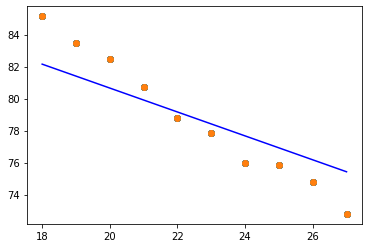

In [38]:
predict(11)
plt.scatter(x, y)
plt.plot(x, m*x+b, 'b')
plt.show()

In [34]:
z=m*27+b
z

75.42539967373573

In [29]:
z=m*21+b
z

79.01430668841762